![](https://cathysuniverse.files.wordpress.com/2012/06/fig-3.png)

In [2]:
from __future__ import unicode_literals, division

import IPython
import warnings
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from pylab import *
from StringIO import StringIO
from scipy.stats import rankdata
from IPython.display import HTML
from IPython.display import display as prnt

# Notebook Options
%matplotlib inline
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

# Matplotlib Styles
c = {'axes.labelsize': 17,
'axes.titlesize': 16,
'figure.figsize': [18, 8],
'grid.linewidth': 1.6,
'legend.fontsize': 17,
'lines.linewidth': 2,
'lines.markeredgewidth': 0.0,
'lines.markersize': 11,
'patch.linewidth': 0.5,
'xtick.labelsize': 16,
'xtick.major.pad': 20,
'xtick.major.width': 2,
'xtick.minor.width': 1,
'ytick.labelsize': 16.0,
'ytick.major.pad': 20,
'ytick.major.width': 2,
'ytick.minor.width': 1 }
wide_c = dict(c, **{'figure.figsize':[20,8]})

# Awards
awards = ['Wit','Jockey','Bloodshed','Style','Support']
award_votes = [a[:2]+str(n) for a in awards for n in range(1,4)]
awards_points = [32,16,8]
multiplier = [0.125,0,25,0.5,1,2,4,8]

# Source Data
id = '1DIVq4s9U_nfY3cHcknGjeV3iGpfW_zxUx-bjFNm4Ebo'
url = 'https://docs.google.com/spreadsheets/d/' + id + '/export?format=csv&id'
r = requests.get(url)
df = pd.read_csv(StringIO(r.content), parse_dates=[u'Timestamp'])

# Utility Functions
def table(df,replace_match="",replace_str=""):
    return IPython.display.display(HTML(df.to_html().replace('<table border="1" class="dataframe">','<table class="table table-striped table-hover">').replace(replace_match,replace_str)))

inv = lambda x: 1 / x


# HTML Functions
h1 = lambda x : prnt(HTML('''<h1 style="text-align:center">'''+ x +'''</h1>'''))
h2 = lambda x: prnt(HTML('''<h2 style="text-align:center">'''+ x +'''</h2>'''))
h2_success = lambda x: prnt(HTML('''<h2 style="text-align:center" class="alert alert-success">'''+ x +'''</h2>'''))

h3_danger = lambda x: prnt(HTML('''<h3 style="text-align:center" class="alert alert-danger">'''+ x +'''</h3>'''))
h3_info = lambda x: prnt(HTML('''<h3 style="text-align:center" class="alert alert-info">'''+ x +'''</h3>'''))
h3_warning = lambda x: (HTML('''<h3 style="text-align:center" class="alert alert-warning">'''+ x +'''</h3>'''))

h3 = lambda x : prnt(HTML('''<h3 style="text-align:center">'''+ x +'''</h3>'''))
p  = lambda x : prnt(HTML('''<p class="text_cell_render">'''+ x +'''</p>'''))

In [3]:
HTML('''<h1 style="text-align:center">ASCENSION | BIDDING</h1>''')

In [4]:
HTML('''<script>

code_show=true;

function code_toggle() {
    if (code_show){ 
        $('div.input').hide();
        $('.output_scroll').removeClass('output_scroll');
        $('.prompt').hide();
    } else {
        $('div.input').show();
        $('.output_scroll').removeClass('output_scroll');
        $('.prompt').show();
    }
    code_show = !code_show
}
</script>
 
<a class='btn btn-warning btn-lg' style="margin:0 auto; display:block; max-width:320px" href="javascript:code_toggle()">TOGGLE CODE</a>''')

## Cleaning Data

In [5]:
del df[u'Multiplier : 1/8']
del df[u'Unnamed: 150']
del df[u' [Row 1]']

In [6]:
df.columns = [col.replace('Character Bid Sheet ','C-') for col in df.columns]
df.columns = [col.replace('Send your Assassins, with the promise of... ','A-') for col in df.columns]

In [7]:
# sorry Rob.
df.Name = df.Name.str.replace('\'','')

In [8]:
df.columns = [col.replace('\'','') for col in df.columns]

In [9]:
df.index = df.Name
del df[u'Name']

## Character Bids

In [10]:
index = ['Multiplier : 1/8', 'Multiplier : 1/4', 'Multiplier : 1/2',
       'Multiplier : 1', 'Multiplier : 2', 'Multiplier : 4',
       'Multiplier : 8']
columns = df.index
df_char = pd.DataFrame(index=index, columns=columns)

In [11]:
# df.ix[1, df.filter(regex='C-.*').columns].unique()

In [12]:
cast = []

for idx, row in df.iterrows():
    for character, item in row['C-[Alliser Thorne]':u'C-[Yohn Royce]'].iteritems():
        clean_character = character.replace('C-[','',).replace(']','',)
        cast.append(clean_character)
        if not pd.isnull(item):
            df_char.ix[item,row.name] = cast[-1]

In [13]:
# Original Bids
df_char = df_char.sort(axis=1)
table(df_char)

Name,Daisy,Dan,Hayley,Ivarius Ironsight,Jannerah Silverscale,Josh Du,Kent,Kirsty,Mart,Max Ng,Rob o Bones,Sherin the Sedulous
Multiplier : 1/8,Petyr Baelish,Margaery Tyrell,Brienne of Tarth,Grey Worm,Petyr Baelish,Tyrion Lannister,Varys,Davos Seaworth,Tyrion Lannister,Petyr Baelish,Petyr Baelish,Varys
Multiplier : 1/4,Margaery Tyrell,Varys,Mance Rayder,Lord of Bones,Arya Stark,Theon Greyjoy,Nymeria Sand,Myrcella Baratheon,Daario Naharis,Daenerys Targaryen,Ramsay Bolton,Jaqen Hghar
Multiplier : 1/2,Pycelle,Melisandre,Sansa Stark,Gregor Clegane,Sansa Stark,Mance Rayder,Kevan Lannister,Margaery Tyrell,The High Sparrow,Jon Snow,Areo Hotah,Olenna Tyrell
Multiplier : 1,Varys,Sansa Stark,Ser Bronn,Brienne of Tarth,Varys,Lord of Bones,Daario Naharis,The High Sparrow,Ramsay Bolton,Cersei Lannister,Myrcella Baratheon,Tycho Nestoris
Multiplier : 2,Nymeria Sand,Jorah Mormont,Robin Arryn,Samwell Tarly,Jorah Mormont,Tyene Sand,Grey Worm,Brienne of Tarth,Ellaria Sand,Tyrion Lannister,Grey Worm,Ellaria Sand
Multiplier : 4,Daario Naharis,Trystane Martell,Olenna Tyrell,Ser Bronn,Margaery Tyrell,Alliser Thorne,Tormund Giantsbane,Samwell Tarly,Loras Tyrell,Margaery Tyrell,Trystane Martell,Doran Martell
Multiplier : 8,Olly,Missandei,Gilly,Pycelle,Brienne of Tarth,Yezzan,Areo Hotah,Varys,Jorah Mormont,Mance Rayder,Jaqen Hghar,Obara Sand


In [14]:
# Unique cast members
cast = set(cast)

## Prestige

In [15]:
from collections import defaultdict

prestige = defaultdict(int)
prestige_scores = [8,4,2,1,0.5,0.25,0.125] 

# Prestige Ranking
for idx, row in enumerate(df_char.itertuples()):
    for char in row[1:]:
        prestige[char] += prestige_scores[idx]

In [16]:
prestige = pd.DataFrame.from_dict(prestige, orient='index').sort([0], ascending=[0])
prestige['Rank'] = range(1, len(prestige) + 1)
prestige.columns = ['Score','Rank']
table(prestige)

,Score,Rank
Petyr Baelish,32.000,1
Varys,22.125,2
Tyrion Lannister,16.500,3
Margaery Tyrell,14.500,4
Brienne of Tarth,9.625,5
Grey Worm,9.000,6
Davos Seaworth,8.000,7
Mance Rayder,6.125,8
Daario Naharis,5.250,9
Lord of Bones,5.000,10


### Bid Prestige

In [17]:
bid_roster = df_char.copy()
bid_prestige = defaultdict(int)

# Roster Prestige
for player in bid_roster:
    for char in bid_roster[player]:
        if not char == u'dead':
            bid_prestige[player] += prestige.ix[char,'Score']
            
bid_prestige = pd.DataFrame.from_dict(bid_prestige, orient='index').sort([0], ascending=[0])
bid_prestige['Rank'] = range(1, len(bid_prestige) + 1)
bid_prestige.columns = ['Score','Rank']
table(bid_prestige)

,Score,Rank
Jannerah Silverscale,88.375,1
Daisy,80.625,2
Max Ng,76.125,3
Kirsty,63.000,4
Rob o Bones,57.750,5
Dan,45.375,6
Kent,45.250,7
Josh Du,32.500,8
Mart,32.125,9
Sherin the Sedulous,30.875,10


## Assassinations

In [18]:
def roster_owner(char):
    for idx, row in df_char.iterrows():
        if len(row[row == char]) == 1:
            return list(row[row == char].index)[0]
        elif len(row[row == char]) == 2:
            return '%s & %s' % tuple(row[row == char].index)

In [19]:
assigned = set()
assassinations_count = 0
roster = df_char.copy()
kill_count = defaultdict(int)
victim_count = defaultdict(int)
last_victim = ''
victim_idx = 0

# Assassinations
for idx, row in df_char.iterrows():
    dead = set(row).intersection(assigned)
    for char in dead:
        mask = roster.ix[idx] == char
        assassinations_count += len(roster.ix[row.name, mask])
        for victim in roster.ix[row.name, mask]:
            if victim == last_victim:
                victim_idx =+ 1
            else:
                victim_idx =+ 0
            last_victim = victim
            owner = roster.ix[row.name, mask].index[victim_idx]
            killer = roster_owner(victim)
            victim_count[owner] += 1
            if '&' in killer:
                for player in killer.split(' & '):
                    kill_count[player] += 1
            else:
                kill_count[killer] += 1
            print owner.ljust(22,' '), 'LOST  ', victim.ljust(19,' '), 'TO  ', killer 
        roster.ix[row.name,mask] = 'dead'
    assigned.update(row)

print '\n', assassinations_count, 'MURDERS'

Daisy                  LOST   Margaery Tyrell     TO   Dan
Dan                    LOST   Varys               TO   Kent & Sherin the Sedulous
Josh Du                LOST   Mance Rayder        TO   Hayley
Kirsty                 LOST   Margaery Tyrell     TO   Dan
Ivarius Ironsight      LOST   Brienne of Tarth    TO   Hayley
Mart                   LOST   Ramsay Bolton       TO   Rob o Bones
Daisy                  LOST   Varys               TO   Kent & Sherin the Sedulous
Jannerah Silverscale   LOST   Varys               TO   Kent & Sherin the Sedulous
Kirsty                 LOST   The High Sparrow    TO   Mart
Josh Du                LOST   Lord of Bones       TO   Ivarius Ironsight
Rob o Bones            LOST   Myrcella Baratheon  TO   Kirsty
Dan                    LOST   Sansa Stark         TO   Hayley & Jannerah Silverscale
Kent                   LOST   Daario Naharis      TO   Mart
Kirsty                 LOST   Brienne of Tarth    TO   Hayley
Daisy                  LOST   Nymeria Sand 

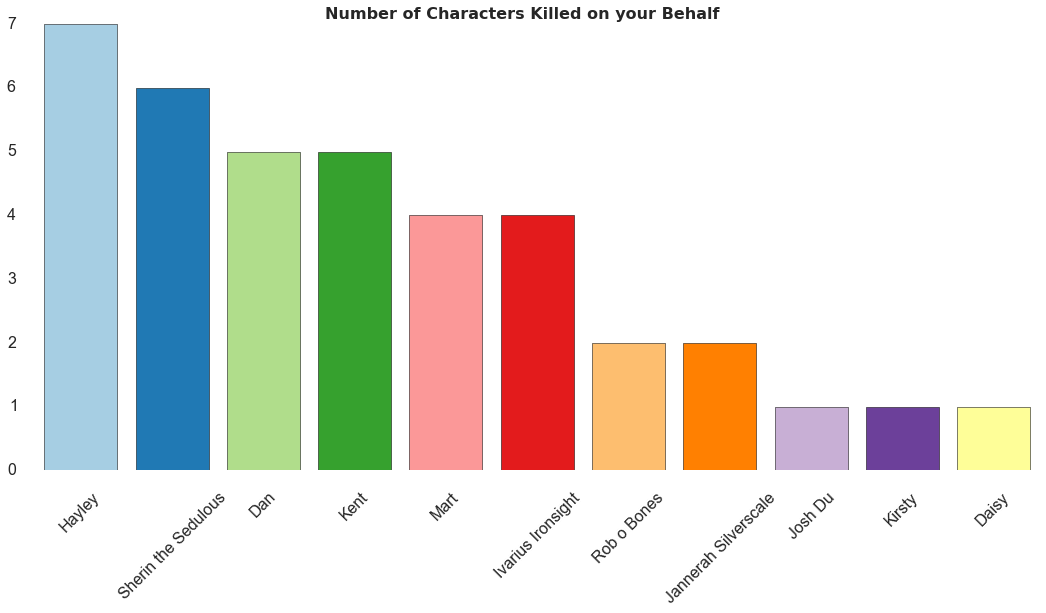

In [20]:
h3_info('Kill Count')
killcount = pd.DataFrame.from_dict(kill_count, orient='index')
killcount.columns = ['Count']
killcount.index.name = "Player"
# table(killcount.sort('Count', ascending=False))

with sns.plotting_context("poster", font_scale=1, rc=c):
        d = killcount.sort('Count', ascending=False).reset_index()
        f, (ax) = plt.subplots(1, 1)
        g = sns.barplot("Player", "Count", data=d, x_order=d.Player, palette="Paired",ax=ax)
        ax.set_xticklabels(d.Player, rotation=45)
        ax.set_title('Number of Characters Killed on your Behalf', x=0.485, y=1.00, fontdict={'weight':'bold','family':'Proxima Nova Regular'})
#         f.suptitle('KILLCOUNT', fontsize=20, fontweight='bold')
        f.add_subplot(ax)
        ax.yaxis.label.set_visible(False)
        ax.xaxis.label.set_visible(False)

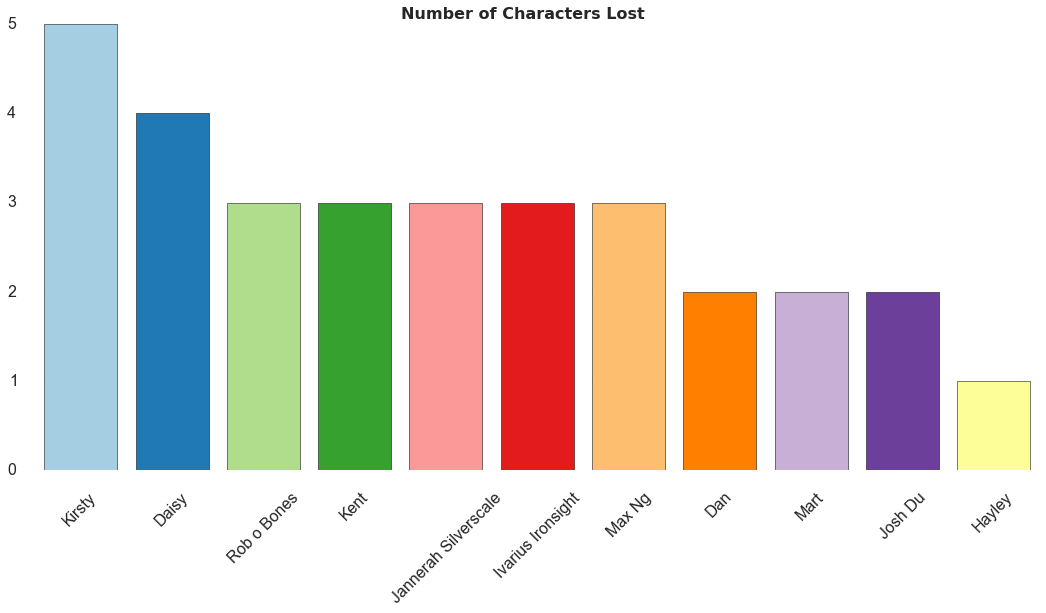

In [21]:
h3_info('Victimhood')
victimhood = pd.DataFrame.from_dict(victim_count, orient='index')
victimhood.columns = ['Count']
victimhood.index.name = "Player"

# table(victimhood.sort('Count', ascending=False))

with sns.plotting_context("poster", font_scale=1, rc=c):
        d = victimhood.sort('Count', ascending=False).reset_index()
        f, (ax) = plt.subplots(1, 1)
        g = sns.barplot("Player", "Count", data=d, x_order=d.Player, palette="Paired",ax=ax)
        ax.set_xticklabels(d.Player, rotation=45)
        ax.set_title('Number of Characters Lost', x=0.485, y=1.00, fontdict={'weight':'bold','family':'Proxima Nova Regular'})
#         f.suptitle('KILLCOUNT', fontsize=20, fontweight='bold')
        f.add_subplot(ax)
        ax.yaxis.label.set_visible(False)
        ax.xaxis.label.set_visible(False)

In [22]:
# Roster following assassinations
table(roster,'dead','<b style="color:red">DEAD</b>')

Name,Daisy,Dan,Hayley,Ivarius Ironsight,Jannerah Silverscale,Josh Du,Kent,Kirsty,Mart,Max Ng,Rob o Bones,Sherin the Sedulous
Multiplier : 1/8,Petyr Baelish,Margaery Tyrell,Brienne of Tarth,Grey Worm,Petyr Baelish,Tyrion Lannister,Varys,Davos Seaworth,Tyrion Lannister,Petyr Baelish,Petyr Baelish,Varys
Multiplier : 1/4,DEAD,DEAD,Mance Rayder,Lord of Bones,Arya Stark,Theon Greyjoy,Nymeria Sand,Myrcella Baratheon,Daario Naharis,Daenerys Targaryen,Ramsay Bolton,Jaqen Hghar
Multiplier : 1/2,Pycelle,Melisandre,Sansa Stark,Gregor Clegane,Sansa Stark,DEAD,Kevan Lannister,DEAD,The High Sparrow,Jon Snow,Areo Hotah,Olenna Tyrell
Multiplier : 1,DEAD,DEAD,Ser Bronn,DEAD,DEAD,DEAD,DEAD,DEAD,DEAD,Cersei Lannister,DEAD,Tycho Nestoris
Multiplier : 2,DEAD,Jorah Mormont,Robin Arryn,Samwell Tarly,Jorah Mormont,Tyene Sand,DEAD,DEAD,Ellaria Sand,DEAD,DEAD,Ellaria Sand
Multiplier : 4,DEAD,Trystane Martell,DEAD,DEAD,DEAD,Alliser Thorne,Tormund Giantsbane,DEAD,Loras Tyrell,DEAD,Trystane Martell,Doran Martell
Multiplier : 8,Olly,Missandei,Gilly,DEAD,DEAD,Yezzan,DEAD,DEAD,DEAD,DEAD,DEAD,Obara Sand


## Roster Prestige

In [23]:
roster_prestige = defaultdict(int)

# Roster Prestige
for player in roster:
    for char in roster[player]:
        if not char == u'dead':
            roster_prestige[player] += prestige.ix[char,'Score']
            
roster_prestige = pd.DataFrame.from_dict(roster_prestige, orient='index').sort([0], ascending=[0])
roster_prestige['Rank'] = range(1, len(roster_prestige) + 1)
roster_prestige.columns = ['Score','Rank']
table(roster_prestige)

,Score,Rank
Jannerah Silverscale,42.125,1
Rob o Bones,39.625,2
Max Ng,39.000,3
Daisy,34.250,4
Sherin the Sedulous,30.875,5
Kent,28.875,6
Mart,26.000,7
Hayley,22.625,8
Josh Du,21.375,9
Dan,18.250,10


In [24]:
prestige_diff = roster_prestige - bid_prestige
prestige_diff.Rank = -1 * prestige_diff.Rank
prestige_diff.columns = ['Δ(Score)','Δ(Rank)']
table(prestige_diff.sort('Δ(Score)', ascending=False))

,Δ(Score),Δ(Rank)
Sherin the Sedulous,0.000,5
Hayley,-2.250,4
Mart,-6.125,2
Josh Du,-11.125,-1
Ivarius Ironsight,-13.000,0
Kent,-16.375,1
Rob o Bones,-18.125,3
Dan,-27.125,-4
Max Ng,-37.125,0
Jannerah Silverscale,-46.250,0


## Assassin Ranking

In [25]:
# Rewards
df.ix[0, df.filter(regex='A-.*').columns].unique()

array([nan, 'Undefined Returns - 4', 'Your Word - 1',
       'Seat on your Small Council\xc2\xa0- 64', 'Royal Decree - 2',
       'A Tumble at House Baelish - 8', 'Mountains of Gold - 128',
       'Their Head - or Yours\xc2\xa0\xc2\xa0- 32', 'Harrenhal - 16'], dtype=object)

In [26]:
index = [
'Mountains of Gold - 128',
'Seat on your Small Council- 64',
'Their Head - or Yours- 32',
'Harrenhal - 16',
'A Tumble at House Baelish - 8',
'Undefined Returns - 4',
'Royal Decree - 2',
'Your Word - 1']

# index = ['M1/8','M1/4','M1/2','M1','M2','M4','M8']
columns = df.index
df_kill = pd.DataFrame(index=index, columns=columns)

In [27]:
for idx, row in df.iterrows():
    for character, item in row['A-[Alliser Thorne]':u'A-[Yohn Royce]'].iteritems():
        if not pd.isnull(item):            
            df_kill.ix[item.decode('ascii','ignore'), row.name] = character.replace('A-[','',).replace(']','',)

In [28]:
# Original rewards
df_kill = df_kill.sort(axis=1)
table(df_kill)

Name,Daisy,Dan,Hayley,Ivarius Ironsight,Jannerah Silverscale,Josh Du,Kent,Kirsty,Mart,Max Ng,Rob o Bones,Sherin the Sedulous
Mountains of Gold - 128,Areo Hotah,Tyrion Lannister,Petyr Baelish,Petyr Baelish,Jon Snow,Tyrion Lannister,Walda Bolton,Maggy the Frog,Pit Announcer,Arya Stark,Ellaria Sand,Lancel Lannister
Seat on your Small Council- 64,Ternesio Terys,Daenerys Targaryen,Cersei Lannister,Arya Stark,Cersei Lannister,Theon Greyjoy,Bowen Marsh,NaN,Gilly,Grey Worm,Maggy the Frog,Samwell Tarly
Their Head - or Yours- 32,Lhara,Petyr Baelish,Varys,Mace Tyrell,Daenerys Targaryen,Varys,Eddison Tollett,NaN,Robin Arryn,Jaime Lannister,Melisandre,Gilly
Harrenhal - 16,Walda Bolton,Cersei Lannister,Daario Naharis,Pycelle,Jaime Lannister,Petyr Baelish,Lhara,NaN,Septa Unella,Jon Snow,Missandei,Pit Announcer
A Tumble at House Baelish - 8,Denys Mallister,Stannis Baratheon,Pycelle,Davos Seaworth,Gregor Clegane,Cersei Lannister,Meryn Trant,NaN,Maggy the Frog,Myrcella Baratheon,Nymeria Sand,Pycelle
Undefined Returns - 4,Loboda,Brienne of Tarth,Grey Worm,Lord of Bones,Pycelle,Arya Stark,Pit Announcer,NaN,Areo Hotah,Ramsay Bolton,Obara Sand,Shireen Baratheon
Royal Decree - 2,Malko,Doran Martell,Jon Snow,NaN,Tyrion Lannister,Brienne of Tarth,Septa Unella,NaN,Loboda,Samwell Tarly,Pycelle,Olly
Your Word - 1,Lancel Lannister,Mance Rayder,White Walkers Master,NaN,Petyr Baelish,Jaqen Hghar,Ternesio Terys,NaN,Bowen Marsh,Sansa Stark,Septa Unella,White Walkers Master


### Manual Fix

In [29]:
# Hayley
replacements = ['Myrcella Baratheon','Mace Tyrell','Pycelle','Septa Unella','Malko','Shireen Baratheon','Missandei','Grey Worm']
df_kill['Hayley'] = replacements

In [30]:
# Ivar
replacements = ['Nymeria Sand', 'Tyene Sand', 'Maggy the Frog', 'Yohn Royce','Yezzan', 'Janos Slynt', 'Lhara','Gilly']
df_kill['Ivarius Ironsight'] = replacements

In [31]:
# Janneke
replacements = ['Gregor Clegane', 'Septa Unella', 'Grey Worm', 'Lord of Bones', 'White Walkers Master', 'Mance Rayder', 'Pit Announcer','Tyene Sand']  
df_kill['Jannerah Silverscale'] = replacements

### Assassins

In [32]:
from collections import defaultdict

assassins = defaultdict(int)
rewards = [128,64,32,16,8,4,2,1] 

# Prestige Ranking
for idx, row in enumerate(df_kill.itertuples()):
    for char in row[1:]:
        if not pd.isnull(char):            
            assassins[char] += rewards[idx]

In [33]:
assassins = pd.DataFrame.from_dict(assassins, orient='index').sort([0], ascending=[0])
assassins['Rank'] = range(1, len(assassins) + 1)
assassins.columns = ['Score','Rank']
table(assassins)

,Score,Rank
Tyrion Lannister,256,1
Maggy the Frog,232,2
Pit Announcer,150,3
Walda Bolton,144,4
Nymeria Sand,136,5
Myrcella Baratheon,136,6
Areo Hotah,132,7
Arya Stark,132,8
Lancel Lannister,129,9
Ellaria Sand,128,10


### Available Assassins

In [34]:
available_asassins = set(assassins.index) - set(assigned)
assassins = assassins.ix[available_asassins,:].sort(['Score'], ascending=[0])
table(assassins)

,Score,Rank
Maggy the Frog,232,2
Pit Announcer,150,3
Walda Bolton,144,4
Lancel Lannister,129,9
Septa Unella,99,12
Bowen Marsh,65,16
Ternesio Terys,65,18
Mace Tyrell,64,20
Lhara,50,22
Jaime Lannister,32,27


### Unused Characters

In [35]:
print 'UNUSED', len(cast - set(assigned) - set(assassins.index))
unassigned = cast - set(assigned) - set(assassins.index)
unassigned

UNUSED 9


{u'Barristan Selmy',
 u'Hizdahr zo Loraq',
 u'Keyr',
 u'Myranda',
 u'Podrick Payne',
 u'Qyburn',
 u'Roose Bolton',
 u'Selyse Baratheon',
 u'Tommen Baratheon'}

### Murder Replacement

### Enter the Mad Killers

In [36]:
mad_killers = pd.DataFrame([list(unassigned), [0] * len(unassigned), [None] * len(unassigned)], ).T
mad_killers.columns = ['index','Score','Rank']
conspire_to_kill = pd.concat([assassins.reset_index(),mad_killers])
conspire_to_kill = conspire_to_kill.set_index('index')
table(conspire_to_kill)

,Score,Rank
index,,
Maggy the Frog,232,2
Pit Announcer,150,3
Walda Bolton,144,4
Lancel Lannister,129,9
Septa Unella,99,12
Bowen Marsh,65,16
Ternesio Terys,65,18
Mace Tyrell,64,20
Lhara,50,22


## Conspire to Kill

In [37]:
final_roster = roster.copy()

killers_assigned = 0

for idx, row in roster.iterrows():
    if len(row[row == 'dead']):
        victims = roster_prestige.ix[list(row[row == 'dead'].index),:].sort('Score', ascending=False).index
        for victim in victims:
            killer = conspire_to_kill.index[killers_assigned % len(conspire_to_kill.index)]
            final_roster.ix[row.name, victim] = killer
            print 'ASSIGNED ', killer.ljust(20,' '), 'TO  ', victim
            killers_assigned += 1

ASSIGNED  Maggy the Frog       TO   Daisy
ASSIGNED  Pit Announcer        TO   Dan
ASSIGNED  Walda Bolton         TO   Josh Du
ASSIGNED  Lancel Lannister     TO   Kirsty
ASSIGNED  Septa Unella         TO   Jannerah Silverscale
ASSIGNED  Bowen Marsh          TO   Rob o Bones
ASSIGNED  Ternesio Terys       TO   Daisy
ASSIGNED  Mace Tyrell          TO   Kent
ASSIGNED  Lhara                TO   Mart
ASSIGNED  Jaime Lannister      TO   Josh Du
ASSIGNED  Eddison Tollett      TO   Dan
ASSIGNED  Yohn Royce           TO   Ivarius Ironsight
ASSIGNED  Malko                TO   Kirsty
ASSIGNED  White Walkers Master TO   Rob o Bones
ASSIGNED  Stannis Baratheon    TO   Max Ng
ASSIGNED  Meryn Trant          TO   Daisy
ASSIGNED  Denys Mallister      TO   Kent
ASSIGNED  Shireen Baratheon    TO   Kirsty
ASSIGNED  Loboda               TO   Jannerah Silverscale
ASSIGNED  Janos Slynt          TO   Max Ng
ASSIGNED  Barristan Selmy      TO   Daisy
ASSIGNED  Podrick Payne        TO   Hayley
ASSIGNED  Myranda  

## Final Character Roster

In [38]:
final_roster.index = ['0.125','0.25','0.5','1','2','4','8']
final_roster = final_roster.reset_index()
final_roster.columns = ['Multiplier'] + list(final_roster.columns[1:])
final_roster = final_roster.set_index('Multiplier')
final_roster.index.name = 'Multiplier'
final_roster = final_roster.sort(axis=1)

In [39]:
table(final_roster)

,Daisy,Dan,Hayley,Ivarius Ironsight,Jannerah Silverscale,Josh Du,Kent,Kirsty,Mart,Max Ng,Rob o Bones,Sherin the Sedulous
Multiplier,,,,,,,,,,,,
0.125,Petyr Baelish,Margaery Tyrell,Brienne of Tarth,Grey Worm,Petyr Baelish,Tyrion Lannister,Varys,Davos Seaworth,Tyrion Lannister,Petyr Baelish,Petyr Baelish,Varys
0.25,Maggy the Frog,Pit Announcer,Mance Rayder,Lord of Bones,Arya Stark,Theon Greyjoy,Nymeria Sand,Myrcella Baratheon,Daario Naharis,Daenerys Targaryen,Ramsay Bolton,Jaqen Hghar
0.5,Pycelle,Melisandre,Sansa Stark,Gregor Clegane,Sansa Stark,Walda Bolton,Kevan Lannister,Lancel Lannister,The High Sparrow,Jon Snow,Areo Hotah,Olenna Tyrell
1,Ternesio Terys,Eddison Tollett,Ser Bronn,Yohn Royce,Septa Unella,Jaime Lannister,Mace Tyrell,Malko,Lhara,Cersei Lannister,Bowen Marsh,Tycho Nestoris
2,Meryn Trant,Jorah Mormont,Robin Arryn,Samwell Tarly,Jorah Mormont,Tyene Sand,Denys Mallister,Shireen Baratheon,Ellaria Sand,Stannis Baratheon,White Walkers Master,Ellaria Sand
4,Barristan Selmy,Trystane Martell,Podrick Payne,Myranda,Loboda,Alliser Thorne,Tormund Giantsbane,Keyr,Loras Tyrell,Janos Slynt,Trystane Martell,Doran Martell
8,Olly,Missandei,Gilly,Maggy the Frog,Tommen Baratheon,Yezzan,Hizdahr zo Loraq,Pit Announcer,Qyburn,Roose Bolton,Selyse Baratheon,Obara Sand


In [40]:
conspire_to_kill

,Score,Rank
index,,
Maggy the Frog,232,2
Pit Announcer,150,3
Walda Bolton,144,4
Lancel Lannister,129,9
Septa Unella,99,12
Bowen Marsh,65,16
Ternesio Terys,65,18
Mace Tyrell,64,20
Lhara,50,22


In [41]:
rank = lambda x: rankdata(1/x, method='min')

assassins = conspire_to_kill

# Prestige
assassin_prestige_points = 1/16

# Prestige | Character : [Score, Rank, Multiplier,Score_log]
rows = []
prestige_characters =  prestige[['Score']]
prestige_assasins  = pd.DataFrame([assassin_prestige_points] * len(assassins), index=assassins.index, columns=['Score'])
prestige = pd.concat([prestige_characters,prestige_assasins])
prestige['Rank'] = rank(prestige.Score)
voted_chars = prestige_characters[prestige_characters.Score > 0].Score.index
for char in voted_chars:
    for col in roster:
        x = roster[roster[col].str.contains(char)]
        if len(x) > 0:
            rows.append([list(x[col])[0], x[col].index[0]])
            break
prestige['Mulitplier'] = pd.DataFrame(rows, columns=['Character','Multiplier']).set_index('Character')
prestige['Score_log'] = np.log(prestige.Score * (1/prestige.Score.min())) + 1
prestige = prestige.fillna(0)
prestige.index.name = 'Character'
prestige.Mulitplier = prestige.Mulitplier.str.replace('Multiplier : ','')
table(prestige)

,Score,Rank,Mulitplier,Score_log
Character,,,,
Petyr Baelish,32.0000,1,1/8,7.238325
Varys,22.1250,2,1/8,6.869297
Tyrion Lannister,16.5000,3,1/8,6.575949
Margaery Tyrell,14.5000,4,1/8,6.446737
Brienne of Tarth,9.6250,5,1/8,6.036953
Grey Worm,9.0000,6,1/8,5.969813
Davos Seaworth,8.0000,7,1/8,5.852030
Mance Rayder,6.1250,8,1/4,5.584967
Daario Naharis,5.2500,9,1/4,5.430817


In [42]:
# Assassins | Character : [Score, Rank]
assassins.columns = ['Score','Rank']
# conspire_to_kill['Rank'] = rank(conspire_to_kill.Score)
assassins.index.name = 'Character'
table(assassins)

,Score,Rank
Character,,
Maggy the Frog,232,2
Pit Announcer,150,3
Walda Bolton,144,4
Lancel Lannister,129,9
Septa Unella,99,12
Bowen Marsh,65,16
Ternesio Terys,65,18
Mace Tyrell,64,20
Lhara,50,22


In [45]:
roster_prestige

,index,Score,Rank
0,Jannerah Silverscale,42.125,1
1,Rob o Bones,39.625,2
2,Max Ng,39.000,3
3,Daisy,34.250,4
4,Sherin the Sedulous,30.875,5
5,Kent,28.875,6
6,Mart,26.000,7
7,Hayley,22.625,8
8,Josh Du,21.375,9
9,Dan,18.250,10


In [46]:
# For safe-keeping
final_roster.to_csv('roster.csv')
assassins.to_csv('assassins.csv')
prestige.to_csv('prestige.csv')
roster_prestige.to_csv('roster_prestige.csv')

### Let the games begin ... 

In [ ]:
HTML('''<link href='http://fonts.googleapis.com/css?family=Roboto|Open+Sans' rel='stylesheet' type='text/css'>
<script>$(function(){$('.table *').css('text-align','center');
$('body').css('font-family', "'Open Sans','Source Sans Pro','Proxima Nova', sans-serif");$('h1,h2,h3,h4,h5').css('font-family', "'Roboto','Source Sans Pro','Proxima Nova', sans-serif");
$('.table, .table *').css('border',0)
code_toggle()})

</script>''')